In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
df = pd.read_csv("../../dataset/ERIC.csv")
# 2. Đọc file csv và gắng index với giá Close
df1=df.reset_index()['Close']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = int(0.1 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
41/41 [==============================] - 27s 368ms/step - loss: 0.0219 - val_loss: 0.0031
Epoch 2/100
41/41 [==============================] - 9s 217ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 3/100
41/41 [==============================] - 9s 221ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 4/100
41/41 [==============================] - 9s 215ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 5/100
41/41 [==============================] - 9s 225ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 6/100
41/41 [==============================] - 10s 250ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 7/100
41/41 [==============================] - 10s 248ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 8/100
41/41 [==============================] - 9s 230ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 9/100
41/41 [==============================] - 10s 238ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 10/100
41/41 [==============================] - 10s 234ms/step - loss: 0.0017 - v

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

8/8 [==============================] - 0s 21ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [12]:
y_test = scaler.inverse_transform(ytest.reshape(-1,1))
ytest

y_val = scaler.inverse_transform(yval.reshape(-1,1))
yval

array([0.26590693, 0.27065527, 0.26115859, 0.28300095, 0.29439696,
       0.27825261, 0.26495726, 0.24216524, 0.24501425, 0.23931624,
       0.24406458, 0.26020893, 0.25735992, 0.2317189 , 0.23646724,
       0.25071225, 0.18518519, 0.21082621, 0.21652422, 0.22032289,
       0.23361823, 0.24786325, 0.23551757, 0.2345679 , 0.22697056,
       0.24406458, 0.24216524, 0.25546059, 0.25830959, 0.24976258,
       0.25546059, 0.26780627, 0.26495726, 0.25641026, 0.24976258,
       0.27825261, 0.27255461, 0.26590693, 0.26020893, 0.26495726,
       0.2640076 , 0.2668566 , 0.26020893, 0.23076923, 0.23266857,
       0.23266857, 0.24501425, 0.22317189, 0.21747388, 0.22792023,
       0.24501425, 0.22412156, 0.22412156, 0.22222222, 0.22412156,
       0.22697056, 0.24596391, 0.24786325, 0.22507123, 0.2022792 ,
       0.17948718, 0.18043685, 0.17188984, 0.15669516, 0.14055081,
       0.13105413, 0.10446344, 0.09496676, 0.09496676, 0.10351377,
       0.08547009, 0.08452042, 0.10921178, 0.13675214, 0.13675

In [13]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_mae = np.mean(np.abs(y_pred - yval))
test_mae = np.mean(np.abs(y_pred - ytest))
valid_mape = np.mean(np.abs((y_pred - y_val) / y_val)) * 100
test_mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAPE:', test_mae)
print('Validation MAE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 6.182359649791563
Testing RMSE: 11.446087450704672


In [15]:
# 13. Dự báo 30 ngày tiếp theo
x_input = val_data[60:].reshape(1, -1)
x_input_shape = x_input.shape[1]

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[1:n_steps+1])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, x_input_shape, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1


0 day input [0.34377968 0.32193732 0.31623932 0.30769231 0.29534663 0.30579297
 0.31813865 0.33903134 0.29724596 0.27160494 0.25261159 0.2668566
 0.24786325 0.24786325 0.26590693 0.28395062 0.30389364 0.27540361
 0.27730294 0.27730294 0.29724596 0.29724596 0.29154796 0.30389364
 0.32288699 0.30674264 0.3048433  0.331434   0.31908832 0.32003799
 0.328585   0.31813865 0.2991453  0.25451092 0.23931624 0.23646724
 0.25641026 0.23266857 0.24501425 0.26590693 0.27065527 0.26115859
 0.28300095 0.29439696 0.27825261 0.26495726 0.24216524 0.24501425
 0.23931624 0.24406458 0.26020893 0.25735992 0.2317189  0.23646724
 0.25071225 0.18518519 0.21082621 0.21652422 0.22032289 0.23361823
 0.24786325 0.23551757 0.2345679  0.22697056 0.24406458 0.24216524
 0.25546059 0.25830959 0.24976258 0.25546059 0.26780627 0.26495726
 0.25641026 0.24976258 0.27825261 0.27255461 0.26590693 0.26020893
 0.26495726 0.2640076  0.2668566  0.26020893 0.23076923 0.23266857
 0.23266857 0.24501425 0.22317189 0.21747388 0.2279

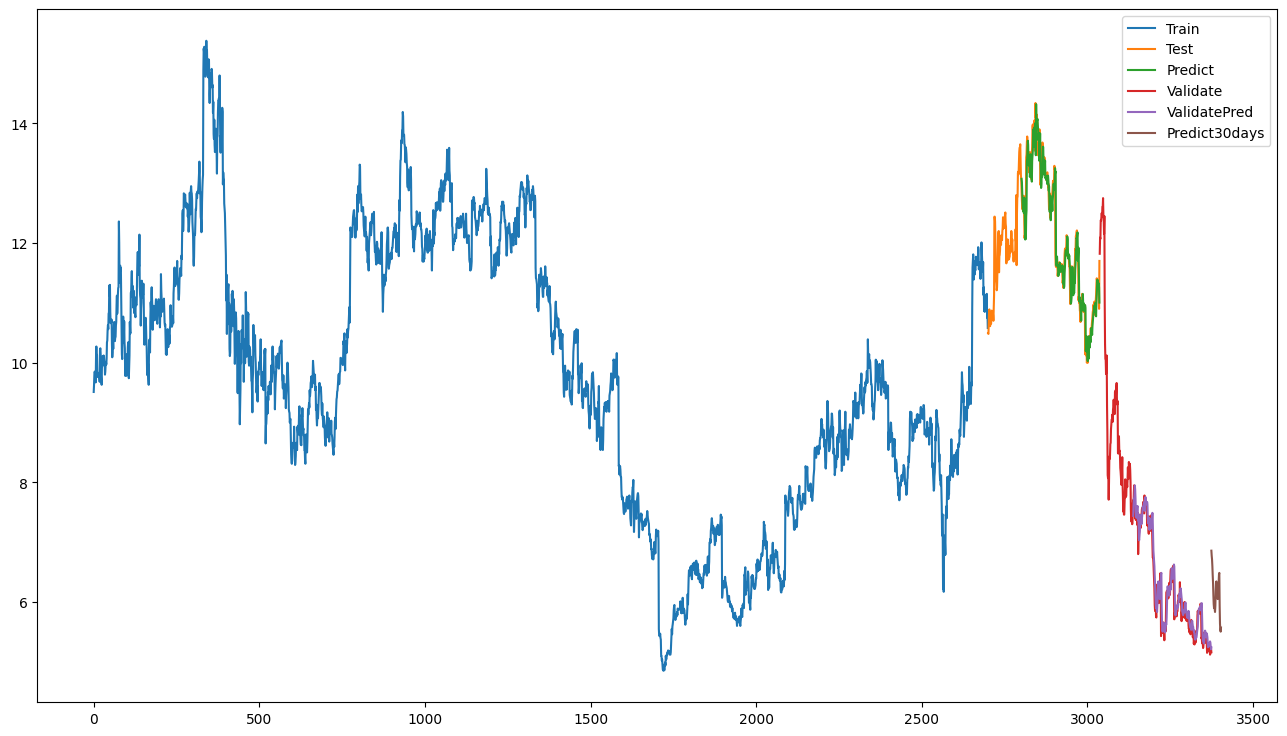

In [16]:
# 14.Vẽ hình
plt.figure(figsize=(16,9))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])

plt.show()